# Setting 

얘들아 이거 맘대로 다 해봐도 좋은데 혹시 모르니께 사본 만들어서 혀!!

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/nianticlabs/monodepth2
%pip install ultralytics

Cloning into 'yolov5'...
remote: Enumerating objects: 15965, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 15965 (delta 82), reused 111 (delta 70), pack-reused 15831
Receiving objects: 100% (15965/15965), 14.54 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (10956/10956), done.
Cloning into 'monodepth2'...
remote: Enumerating objects: 180, done.
remote: Total 180 (delta 0), reused 0 (delta 0), pack-reused 180
Receiving objects: 100% (180/180), 10.27 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.5/593.5 kB 16.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# read file

In [ ]:
import os
file_list = os.listdir("/content/drive/MyDrive/우수학부생/train") #이미지 경로 변경 가능
file_list = [ file for file in file_list if file.endswith("jpg") ]

# yolov5 

### save result images and txt file /content/result/exp

In [ ]:
!python /content/yolov5/detect.py --source "/content/drive/MyDrive/우수학부생/train" --conf 0.02 --save-txt --project /content/result #경로 변경 가능 

detect: weights=yolov5/yolov5s.pt, source=/content/drive/MyDrive/우수학부생/train, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.02, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/result, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 222.7 MB/s eta 0:00:00

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 

# monodepth2

In [ ]:
cd /content/monodepth2

/content/monodepth2


In [ ]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

import os
import numpy as np
import PIL.Image as pil
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

import networks
from utils import download_model_if_doesnt_exist

In [ ]:
model_name = "mono_640x192" #모델 변경 가능

download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("models", model_name, "encoder.pth")
depth_decoder_path = os.path.join("models", model_name, "depth.pth")

# LOADING PRETRAINED MODEL
encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict_enc = torch.load(encoder_path, map_location='cpu')
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)

loaded_dict = torch.load(depth_decoder_path, map_location='cpu')
depth_decoder.load_state_dict(loaded_dict)

encoder.eval()
depth_decoder.eval(); 

-> Downloading pretrained model to models/mono_640x192.zip
   Unzipping model...
   Model unzipped to models/mono_640x192


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
cd ..

/content


In [ ]:
image_path = "/content/result/exp/MP_SEL_PN000601.jpg"

input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)

In [ ]:
with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]

In [ ]:
input_image.size

(1920, 1080)

Class : 2.0 
Disp value at position ( 0.634259 , 0.127865 ): 0.47245786
Class : 73.0 
Disp value at position ( 0.440741 , 0.301562 ): 0.44214
Class : 24.0 
Disp value at position ( 0.625926 , 0.224219 ): 0.4087039
Class : 2.0 
Disp value at position ( 0.565741 , 0.548437 ): 0.14044091
Class : 10.0 
Disp value at position ( 0.870833 , 0.910677 ): 0.52964824
Class : 2.0 
Disp value at position ( 0.600463 , 0.900781 ): 0.42019224
Class : 2.0 
Disp value at position ( 0.577778 , 0.898438 ): 0.4062783
Class : 28.0 
Disp value at position ( 0.869444 , 0.911458 ): 0.53025174
Class : 0.0 
Disp value at position ( 0.605093 , 0.994792 ): 0.47780284
Class : 7.0 
Disp value at position ( 0.515278 , 0.74401 ): 0.23533009
Class : 2.0 
Disp value at position ( 0.872685 , 0.911458 ): 0.5296085
Class : 0.0 
Disp value at position ( 0.528241 , 0.684896 ): 0.17569074
Class : 2.0 
Disp value at position ( 0.550463 , 0.747135 ): 0.24299546
Class : 7.0 
Disp value at position ( 0.592593 , 0.756771 ): 0.2461

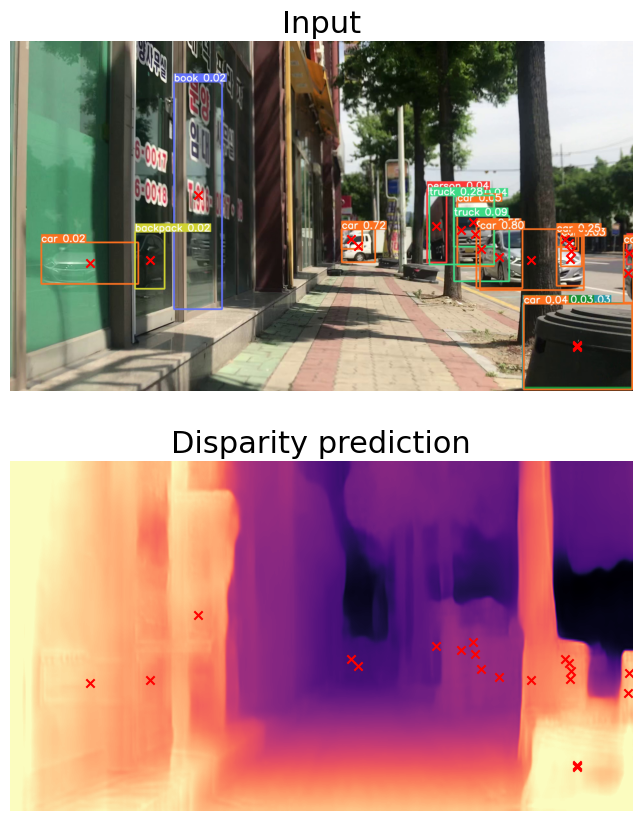

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

disp_resized = torch.nn.functional.interpolate(disp, (original_height, original_width), mode="bilinear", align_corners=False)
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)
# 원본 이미지와 disp 맵 출력
plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.imshow(input_image)

with open(os.path.join("/content/result/exp/labels/", "/content/result/exp/labels/MP_SEL_PN000601.txt"), 'r') as f:
        lines = f.readlines()
        for line in lines:
          class_label, xmin, ymin, width, height = map(float, line.strip().split(' '))
          plt.scatter(xmin *1920, ymin*1080, c='red', marker='x') 

plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)

with open(os.path.join("/content/result/exp/labels/", "/content/result/exp/labels/MP_SEL_PN000601.txt"), 'r') as f:
        lines = f.readlines()
        for line in lines:
          class_label, xmin, ymin, width, height = map(float, line.strip().split(' '))
          plt.scatter(xmin *1920, ymin*1080, c='red', marker='x')
          disp_value = disp_resized_np[int(ymin*1080), int(xmin*1920)]
          print("Class :",class_label,"\nDisp value at position (", ymin, ",", xmin, "):", disp_value) 


plt.title("Disparity prediction", fontsize=22)
plt.axis('off')

plt.show()

In [ ]:
"disp_resized_np.shape

(1080, 1920)

### .

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 예시 disp 맵
disp_resized = torch.nn.functional.interpolate(disp, (original_height, original_width), mode="bilinear", align_corners=False)
disp_resized_np = disp_resized.squeeze().cpu().numpy()

# 특정 위치의 좌표
x = 0.56510365 * 1920
y = 0.5935188 * 1080

# 원본 이미지와 disp 맵 출력
plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.imshow(input_image)
plt.scatter(x, y, c='red', marker='x')  # 특정 위치에 빨간색 X 표시
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
plt.scatter(x, y, c='red', marker='x')  # 특정 위치에 빨간색 X 표시
plt.title("Disparity prediction", fontsize=22)
plt.axis('off')

plt.show()


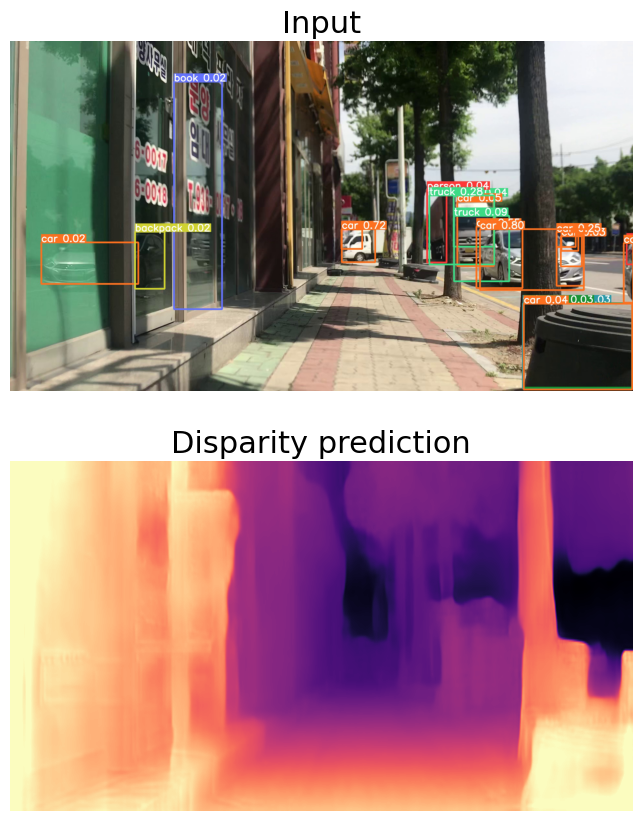

In [ ]:
disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(input_image)
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');


In [ ]:
import torch

# 예시 disp 맵
disp_map = torch.randn(1, 1, 192, 640)  # disp 맵의 shape은 torch.Size([1, 1, 192, 640])

# 특정 위치의 좌표
y = 100
x = 300

# 해당 위치의 disp 값을 추출
disp_value = disp_map[0, 0, y, x].item()

print("Disp value at position (", y, ",", x, "):", disp_value)

Disp value at position ( 100 , 300 ): -1.7667673826217651


In [ ]:
with open(os.path.join("/content/result/exp/labels/", "/content/result/exp/labels/MP_SEL_PN000601.txt"), 'r') as f:
        lines = f.readlines()
        for line in lines:
          # 사각형 정보 추출
          class_label, xmin, ymin, width, height = map(float, line.strip().split(' '))

          # 가운데 부분 좌표 계산
          center_x = xmin + (width / 2)
          center_y = ymin + (height / 2)

          print(f"클래스 레이블: {int(class_label)}, 사각형 가운데 좌표: ({center_x}, {center_y})")

클래스 레이블: 2, 사각형 가운데 좌표: (0.2057295, 0.6935185)
클래스 레이블: 73, 사각형 가운데 좌표: (0.34010365, 0.765741)
클래스 레이블: 24, 사각형 가운데 좌표: (0.2479169, 0.7074075)
클래스 레이블: 2, 사각형 가운데 좌표: (0.56510365, 0.5935188)
클래스 레이블: 10, 사각형 가운데 좌표: (0.9984375, 0.9925925)
클래스 레이블: 2, 사각형 가운데 좌표: (0.9177081, 0.64351855)
클래스 레이블: 2, 사각형 가운데 좌표: (0.9119796499999999, 0.5990743000000001)
클래스 레이블: 28, 사각형 가운데 좌표: (0.998437, 0.9898145)
클래스 레이블: 0, 사각형 가운데 좌표: (1.00000035, 0.63796335)
클래스 레이블: 7, 사각형 가운데 좌표: (0.7760412499999999, 0.5870375)
클래스 레이블: 2, 사각형 가운데 좌표: (0.998437, 0.9953700000000001)
클래스 레이블: 0, 사각형 가운데 좌표: (0.700521, 0.6324075)
클래스 레이블: 2, 사각형 가운데 좌표: (0.7765621, 0.6425925)
클래스 레이블: 7, 사각형 가운데 좌표: (0.8010418499999999, 0.6861115)
클래스 레이블: 2, 사각형 가운데 좌표: (0.9078126, 0.5879632)
클래스 레이블: 2, 사각형 가운데 좌표: (0.920833, 0.6990740000000001)
클래스 레이블: 7, 사각형 가운데 좌표: (0.7770834999999999, 0.6379630000000001)
클래스 레이블: 2, 사각형 가운데 좌표: (1.0000001, 0.7472219999999999)
클래스 레이블: 2, 사각형 가운데 좌표: (0.82239615, 0.705556)
클래스 레이블: 2, 사각형 가운데 좌표

In [ ]:
#전체 txt파일 순회
import os

output_folder = "/content/result/exp/labels/"  #txt파일 폴더 

# 모든 txt 파일의 경로
txt_files = [file for file in os.listdir(output_folder) if file.endswith('.txt')]

for txt_file in txt_files:
    with open(os.path.join(output_folder, txt_file), 'r') as f:
        lines = f.readlines()
        for line in lines:
          # 사각형 정보 추출
          class_label, xmin, ymin, width, height = map(float, line.strip().split(' '))

          # 가운데 부분 좌표 계산
          center_x = xmin + (width / 2)
          center_y = ymin + (height / 2)

          print(f"클래스 레이블: {int(class_label)}, 사각형 가운데 좌표: ({center_x}, {center_y})")

클래스 레이블: 26, 사각형 가운데 좌표: (0.5317704, 0.2388893)
클래스 레이블: 2, 사각형 가운데 좌표: (0.1244789, 0.12222265)
클래스 레이블: 58, 사각형 가운데 좌표: (0.5890626, 0.28425885)
클래스 레이블: 0, 사각형 가운데 좌표: (0.2208329, 0.137963)
클래스 레이블: 11, 사각형 가운데 좌표: (0.2182296, 0.10185185000000001)
클래스 레이블: 58, 사각형 가운데 좌표: (0.707812, 0.31851799999999997)
클래스 레이블: 2, 사각형 가운데 좌표: (0.020312450000000003, 0.12499950000000001)
클래스 레이블: 58, 사각형 가운데 좌표: (0.50989535, 0.2833335)
클래스 레이블: 58, 사각형 가운데 좌표: (0.5901044, 0.2851855)
클래스 레이블: 2, 사각형 가운데 좌표: (0.9999996, 0.3166665)
클래스 레이블: 58, 사각형 가운데 좌표: (0.5781247500000001, 0.2814816)
클래스 레이블: 2, 사각형 가운데 좌표: (0.99999985, 0.31388885)
클래스 레이블: 2, 사각형 가운데 좌표: (0.06875005, 0.12685165)
클래스 레이블: 11, 사각형 가운데 좌표: (0.21979165, 0.14259275)
클래스 레이블: 10, 사각형 가운데 좌표: (0.22031225000000002, 0.14166675)
클래스 레이블: 0, 사각형 가운데 좌표: (0.5624999, 0.299074)
클래스 레이블: 2, 사각형 가운데 좌표: (0.9947915, 0.342592)
클래스 레이블: 9, 사각형 가운데 좌표: (0.14739565000000002, 0.16296305)
클래스 레이블: 58, 사각형 가운데 좌표: (0.89427115, 0.27870334999999996)
클래스 레이블: 